In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
cars_flag = False
if cars_flag:
    src = '../cars/car.data'
    import warnings
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
else:
    src = '../adult/data.txt'
data = pd.read_csv(src, index_col=0)

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,61,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Germany,>50K
1,37,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,15024,0,40,United-States,>50K
2,50,Private,1st-4th,2,Married-spouse-absent,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
3,38,Private,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
4,56,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Black,Female,0,0,38,United-States,<=50K


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
# Set data set specific settings for template

mappings = {}
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'class']
if cars_flag:
    scoring = metrics.make_scorer(metrics.matthews_corrcoef)    
    for i in data.columns:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)
else:
    scoring = 'accuracy'    
    for i in cols:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)

In [6]:
mappings

{'class': [' <=50K', ' >50K'],
 'education': [' 10th',
  ' 11th',
  ' 12th',
  ' 1st-4th',
  ' 5th-6th',
  ' 7th-8th',
  ' 9th',
  ' Assoc-acdm',
  ' Assoc-voc',
  ' Bachelors',
  ' Doctorate',
  ' HS-grad',
  ' Masters',
  ' Preschool',
  ' Prof-school',
  ' Some-college'],
 'marital-status': [' Divorced',
  ' Married-AF-spouse',
  ' Married-civ-spouse',
  ' Married-spouse-absent',
  ' Never-married',
  ' Separated',
  ' Widowed'],
 'native-country': [' ?',
  ' Cambodia',
  ' Canada',
  ' China',
  ' Columbia',
  ' Cuba',
  ' Dominican-Republic',
  ' Ecuador',
  ' El-Salvador',
  ' England',
  ' France',
  ' Germany',
  ' Greece',
  ' Guatemala',
  ' Haiti',
  ' Honduras',
  ' India',
  ' Iran',
  ' Ireland',
  ' Italy',
  ' Jamaica',
  ' Japan',
  ' Laos',
  ' Mexico',
  ' Nicaragua',
  ' Outlying-US(Guam-USVI-etc)',
  ' Peru',
  ' Philippines',
  ' Poland',
  ' Portugal',
  ' Puerto-Rico',
  ' Scotland',
  ' South',
  ' Taiwan',
  ' Thailand',
  ' Trinadad&Tobago',
  ' United-States

In [7]:
X = data.loc[:,data.columns != 'class']
y = data.iloc[:,-1]

In [8]:
print(X.shape)
print(y.shape)
X.head()

(3000, 13)
(3000,)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,61,4,9,13,2,4,0,4,1,0,0,50,11
1,37,3,9,13,2,10,5,2,0,15024,0,40,36
2,50,3,3,2,3,3,4,4,1,0,0,40,36
3,38,3,11,9,2,13,0,4,1,0,0,50,36
4,56,3,11,9,6,1,4,2,0,0,0,38,36


In [9]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: class, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
from sklearn.svm import SVC

In [12]:
clf = SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [16]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring=scoring)
print(scoring)

accuracy


In [17]:
train_scores_mean = np.mean(train_scores,axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

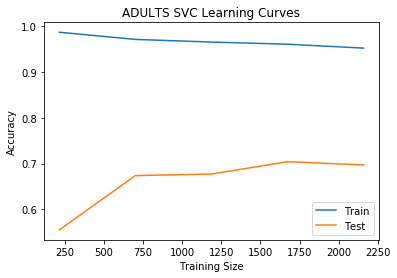

In [18]:
plt.title("ADULTS SVC Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, test_scores_mean, label="Test")
plt.legend(loc='best')

In [26]:
param_range = [0.5, 0.6, 0.7, 0.8, 0.9,1.0]
train_scores, test_scores = validation_curve(clf, X_train, y_train, 
                                             param_name='C', 
                                             param_range=param_range,
                                             cv=10,
                                             scoring=scoring)

In [27]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

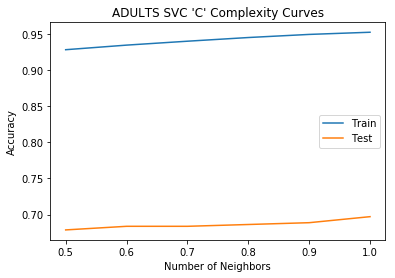

In [28]:
plt.title("ADULTS SVC 'C' Complexity Curves")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.plot(param_range, train_scores_mean, label="Train")
plt.plot(param_range, test_scores_mean, label="Test")
plt.legend(loc='best')

In [23]:
param_range = [1.0, 1.1, 1.2, 1.3, 1.4,1.5]
train_scores, test_scores = validation_curve(clf, X_train, y_train, 
                                             param_name='C', 
                                             param_range=param_range,
                                             cv=10,
                                             scoring=scoring)

In [24]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

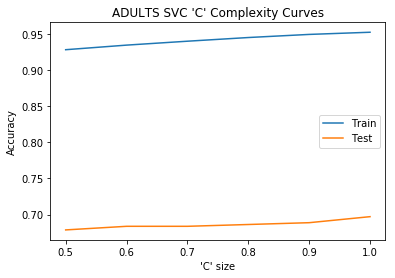

In [32]:
plt.title("ADULTS SVC 'C' Complexity Curves")
plt.xlabel("'C' size")
plt.ylabel("Accuracy")
plt.plot(param_range, train_scores_mean, label="Train")
plt.plot(param_range, test_scores_mean, label="Test")
plt.legend(loc='best')

In [29]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred = clf.predict(X_test)

In [31]:
print metrics.accuracy_score(y_test, y_pred)

0.7066666666666667
